In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

В этой тетрадке собраны baselines и условие задачи.

#Примеры рядов

Открываем файл с временными рядами

In [6]:
data_full_1_104 = pd.read_csv('data_full_1_104.csv')
data_full_1_104.irow(range(0,5))

,Unnamed: 0,ID,DiskSize,Creation,First,StartTime,Now,1,2,3,...,95,96,97,98,99,100,101,102,103,104
0,0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.635799,104591,104670,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,134
1,1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,2.819260,104607,104676,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,1.370105,104607,104666,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,3.490704,104607,104740,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.289290,104607,104685,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Рисуем несколько рядов

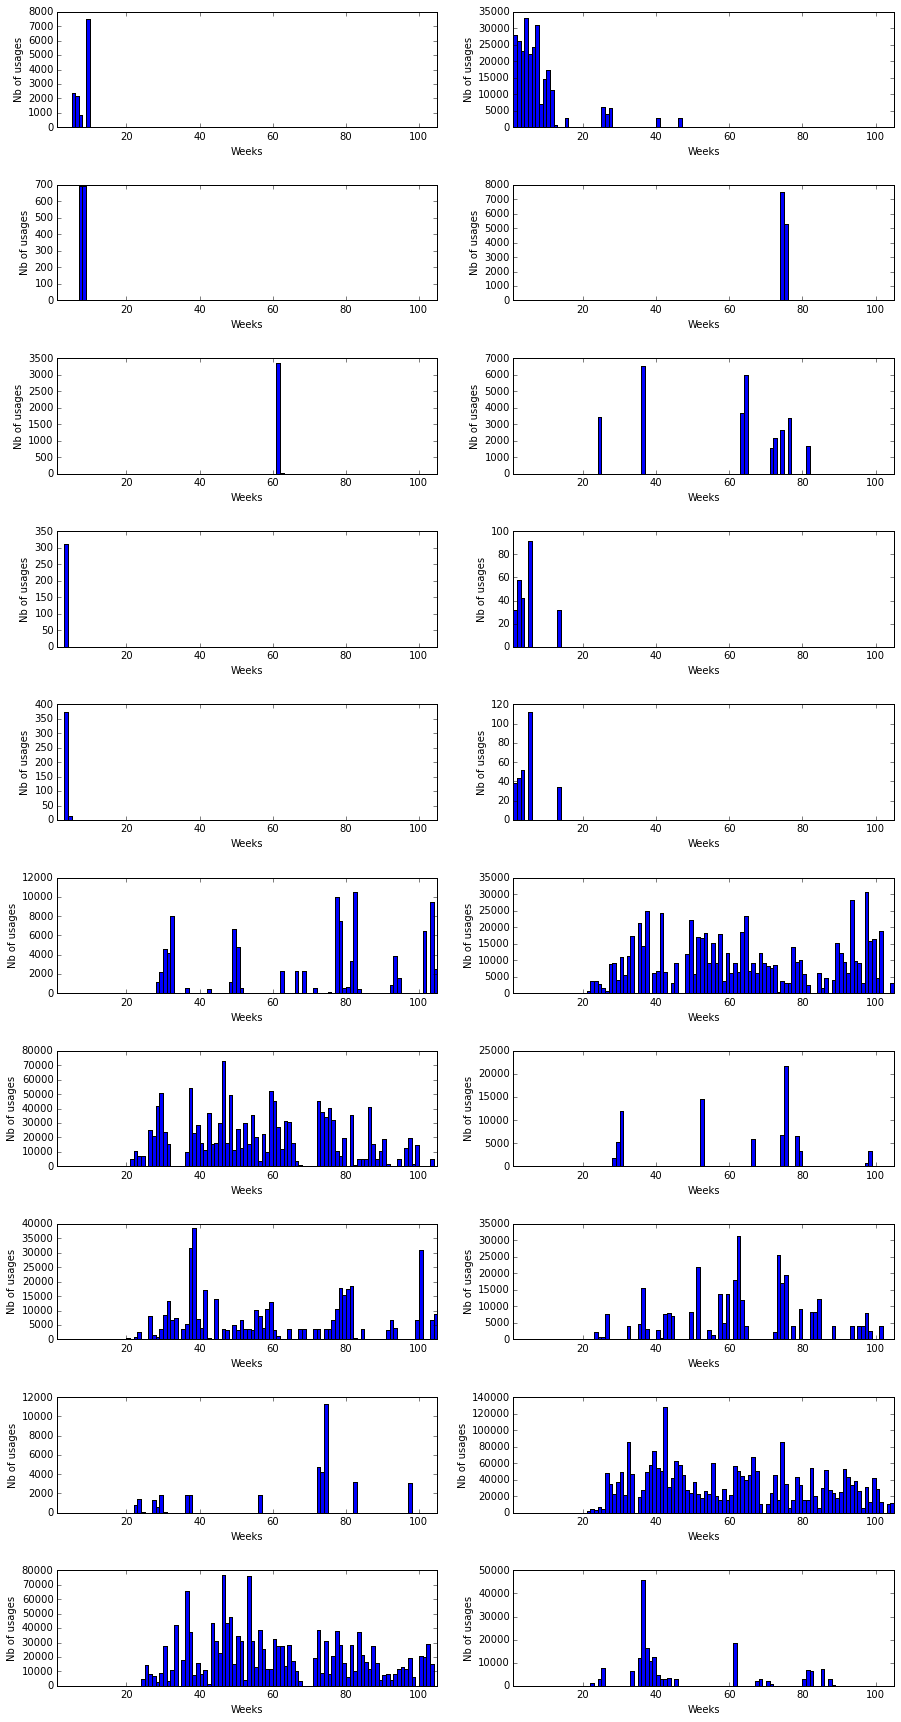

In [28]:
periods = [str(i) for i in range(1,105)]

plt.figure(figsize=(15,30))
plt.subplots_adjust( hspace=.5)
for i in range(48,68):#менять тут
    one_time_serie = data_full_1_104[periods].irow(i).values
    plt.subplot(10,2,i-47)#и тут
    plt.bar(range(1,105), one_time_serie, width=1, bottom=0)
    plt.xlim(1,105)
    plt.xlabel('Weeks')
    plt.ylabel('Nb of usages')
plt.show()

#Baselines

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Открываем первй файл задачи

In [9]:
data1_53 = pd.read_csv('data1_53.csv')
data1_53.irow(range(0,6))

,Unnamed: 0,ID,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,label
0,0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,376,0,0,0,198,134,0,67,1
1,1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagUp...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,266,260,0,130,1
4,4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagUp...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagUp...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Среднее число использований файлов по неделям

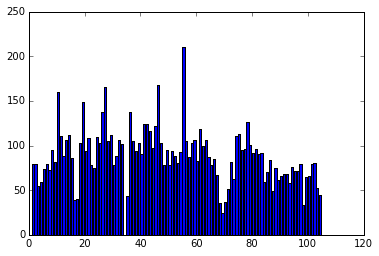

In [84]:
plt.bar(range(1, 105), (data_full_1_104.ix[:,'1':'104']).mean(axis=0));
plt.show;

Число использованных файлов всего по неделям

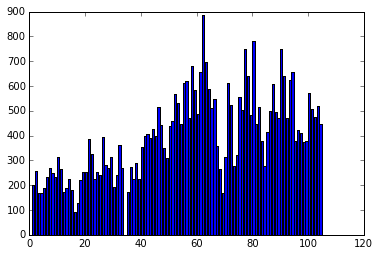

In [51]:
plt.bar(range(1, 105), [len(data_full_1_104[data_full_1_104[str(x)]>0]) for x in range(1, 105)]);

Делим данные на обучение/тестирование

In [10]:
from sklearn.cross_validation import train_test_split
ind_train, ind_test, _, _ = train_test_split(data1_53.index, data1_53.index, test_size=0.33, random_state=42)

Подготовка данных для классификатора

In [16]:
X_train = data1_53[[str(i) for i in range(1,53)]].values[ind_train,:]
X_test = data1_53[[str(i) for i in range(1,53)]].values[ind_test,:]

y_train = data1_53['label'].values[ind_train]
y_test = data1_53['label'].values[ind_test]

Обучаем классификатор

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=2500, max_depth=6, subsample=0.8)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2, n_estimators=2500,
              random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

In [124]:
gbc.score(X_test, y_test)

0.84008528784648184

Строим ROC кривые для обучения и теста

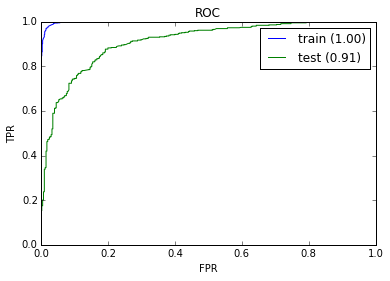

In [32]:
from sklearn.metrics import roc_curve, auc

fpr_train, tpr_train, _ = roc_curve(y_train, gbc.predict_proba(X_train)[:,1])
roc_auc_train = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, label='train (%.2f)' % roc_auc_train)

fpr_test, tpr_test, _ = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, label='test (%.2f)' % roc_auc_test)

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.show()

Открываем второй файл данных

In [12]:
data2_54 = pd.read_csv('data2_54.csv')
data2_54.irow(range(0,3))

,Unnamed: 0,ID,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,label
0,0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,376,0,0,0,198,134,0,67,0,1
1,1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Подготовка данных

In [13]:
X_train2 = data2_54[[str(i) for i in range(2,54)]].values[ind_train,:]
X_test2 = data2_54[[str(i) for i in range(2,54)]].values[ind_test,:]

y_train2 = data2_54['label'].values[ind_train]
y_test2 = data2_54['label'].values[ind_test]

In [227]:
def draw_roc(X_test, y_test, X_test2, y_test2, label1, label2, clf) :
    fpr_test, tpr_test, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, label=label1+' (%.2f)' % roc_auc_test)

    fpr_test2, tpr_test2, _ = roc_curve(y_test2, clf.predict_proba(X_test2)[:,1])
    roc_auc_test2 = auc(fpr_test2, tpr_test2)
    plt.plot(fpr_test2, tpr_test2, label=label2+' (%.2f)' % roc_auc_test2)

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc='best')
    plt.show()

Используем обученный классификатор для прогноза и строим ROC кривые

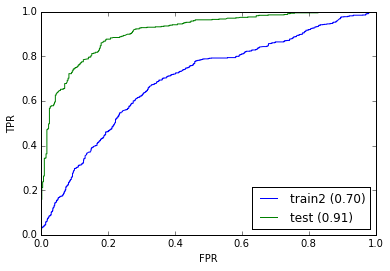

In [228]:
from sklearn.metrics import roc_curve, auc

draw_roc(X_train2, y_train2, X_test, y_test, 'train2', 'test', gbc)

ROC кривые на двух тестовых выборках и есть baselines задачи.

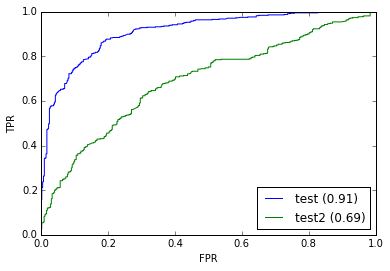

In [229]:
draw_roc(X_test, y_test, X_test2, y_test2, 'test', 'test2', gbc)

#Задача

1. Поставить ipython
2. Почитать про Restricted Boltzmann Machines (RBM) и Deep Belief Networks (DBN).
3. Выбрать и разобрать библиотеку с DBN (scikit-learn, nolearn, theanet(!?), pybrain(?)).
4. Используя DBN увеличить ROC AUC для test2.
5. Используя DBN увеличить ROC AUC для test и test2.

In [2]:
from sklearn.metrics import accuracy_score

In [14]:
from nolearn.dbn import DBN

In [72]:
results = []
for hiddens in range(2, 72, 5):
    dbn = DBN([X_train.shape[1], hiddens, 2], learn_rates = 0.3,
    learn_rate_decays = 0.9, epochs = 10)
    dbn.fit(X_train, y_train)
    results.append([hiddens, dbn.score(X_test, y_test)])

In [73]:
results

[[2, 0.5788912579957356],
 [7, 0.5788912579957356],
 [12, 0.5831556503198294],
 [17, 0.5788912579957356],
 [22, 0.5788912579957356],
 [27, 0.5831556503198294],
 [32, 0.5810234541577826],
 [37, 0.5852878464818763],
 [42, 0.5788912579957356],
 [47, 0.5831556503198294],
 [52, 0.5810234541577826],
 [57, 0.584221748400853],
 [62, 0.5810234541577826],
 [67, 0.5788912579957356]]

In [116]:
dbn = DBN([X_train.shape[1], 35, 2], learn_rates = 0.3,
    learn_rate_decays = 0.9, epochs = 15)
dbn.fit(X_train2, y_train2)

In [121]:
dbn.predict_proba(X_train2).shape

(1902, 2)

In [101]:
from sklearn.metrics import classification_report
preds = dbn.predict(X_test)
print classification_report(y_test, preds)

             precision    recall  f1-score   support

        0.0       0.42      1.00      0.59       395
        1.0       0.00      0.00      0.00       543

avg / total       0.18      0.42      0.25       938



In [76]:
preds2 = dbn.predict(X_test2)
print classification_report(y_test2, preds)

             precision    recall  f1-score   support

        0.0       0.50      0.00      0.00       418
        1.0       0.55      1.00      0.71       520

avg / total       0.53      0.55      0.40       938



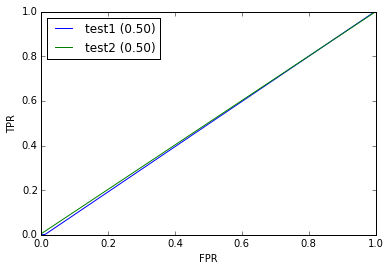

In [230]:
draw_roc(X_test, y_test, X_test2, y_test2, 'test1', 'test2', dbn)

In [129]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [160]:
def test_clf (X_train, y_train, X_test, y_test, clf, name) :
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print name, "accuracy: ",acc

In [187]:
def test_all (X_train, y_train, X_tests, y_tests, clfs, names) :
    for c in xrange(len(clfs)):
        for i in xrange(np.shape(X_tests)[0]) :
            test_clf (X_train, y_train, X_tests[i], y_tests[i], clfs[c], (names[c]+" test "+str(i+1)))

In [189]:
test_all (X_train, y_train, [X_test, X_test2], [y_test, y_test2], 
          [gbc, RandomForestClassifier(), SGDClassifier(), LinearSVC(), SVC(1), 
           DBN([X_train.shape[1], 30, 2],learn_rates=0.3,learn_rate_decays=0.9,epochs=15)],
         ['gradient boosting', 'random forest', 'stochastic gradient descent', 'linearSVM', 'SVM', 'deep belief net'])

gradient boosting test 1 accuracy:  0.842217484009
gradient boosting test 2 accuracy:  0.649253731343
random forest test 1 accuracy:  0.818763326226
random forest test 2 accuracy:  0.638592750533
stochastic gradient descent test 1 accuracy:  0.585287846482
stochastic gradient descent test 2 accuracy:  0.644989339019
linearSVM test 1 accuracy:  0.634328358209
linearSVM test 2 accuracy:  0.574626865672
SVM test 1 accuracy:  0.721748400853
SVM test 2 accuracy:  0.56289978678
deep belief net test 1 accuracy:  0.58315565032
deep belief net test 2 accuracy:  0.553304904051


In [241]:
rfc = RandomForestClassifier(n_estimators=15, max_leaf_nodes=10)
rfc.fit(X_train, y_train);

Random forest classifier


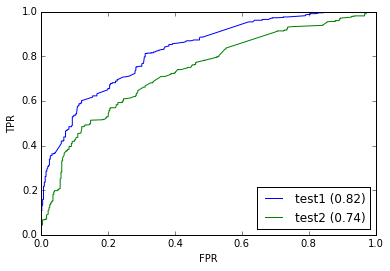

In [242]:
print 'Random forest classifier'
draw_roc(X_test, y_test, X_test2, y_test2, 'test1', 'test2', rfc)

Random forest classifier


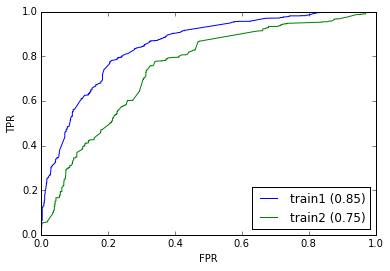

In [232]:
print 'Random forest classifier'
draw_roc(X_train, y_train, X_train2, y_train2, 'train1', 'train2', rfc)

In [159]:
test_clf (X_train, y_train, X_test, y_test, gbc, "gradient boosting classifier")

gradient boosting classifier  accuracy:  0.840085287846


In [162]:
test_clf (X_train, y_train, X_test2, y_test2, gbc, "gradient boosting classifier test2")

gradient boosting classifier test2 accuracy:  0.6460554371


In [165]:
test_clf (X_train, y_train, X_test, y_test, RandomForestClassifier(), "random forest classifier")

random forest classifier accuracy:  0.80170575693


In [164]:
test_clf (X_train, y_train, X_test2, y_test2, RandomForestClassifier(), "random forest classifier test2")

random forest classifier test2 accuracy:  0.663113006397


In [166]:
test_clf (X_train, y_train, X_test, y_test, SGDClassifier(), "stochastic gradient descent classifier")

stochastic gradient descent classifier accuracy:  0.585287846482


In [168]:
test_clf (X_train, y_train, X_test2, y_test2, SGDClassifier(), "stochastic gradient descent classifier test2")

stochastic gradient descent classifier test2 accuracy:  0.644989339019


In [128]:
clf_svm = LinearSVC()
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print "Linear SVM accuracy: ",acc_svm

Linear SVM accuracy:  0.539445628998


In [188]:
space = np.logspace(np.log10(0.00001), np.log10(100), 15)
best_acc = 0.
bestC = 0.
for C in space:
    clf_svm = SVC(C)
    clf_svm.fit(X_train, y_train)
    y_pred_svm = clf_svm.predict(X_test2)
    acc_svm = accuracy_score(y_test2, y_pred_svm)
    if acc_svm > best_acc:
        best_acc = acc_svm
        bestC = C
print "SVM accuracy: ",best_acc, "  ", bestC

SVM accuracy:  0.56289978678    1.0


In [140]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print "nearest neighbors accuracy: ",acc_knn

nearest neighbors accuracy:  0.775053304904


In [154]:
clf_nn = DBN([X_train.shape[1], 30, 2],learn_rates=0.3,learn_rate_decays=0.9,epochs=15)
clf_nn.fit(X_train, y_train)
acc_nn = clf_nn.score(X_test,y_test)
print "dbn accuracy: ",acc_nn

dbn accuracy:  0.586353944563


In [249]:
import lasagne
import theano
import theano.tensor as T

ImportError: No module named lasagne